In [1]:
  >>> import os
  >>> import numpy as np
  >>> from pyuvdata import UVBeam
  >>> from pyuvdata.data import DATA_PATH
  >>> import matplotlib.pyplot as plt


In [2]:
  >>> vivaldi_file = "/Users/bryna/Projects/Physics/HERA/HERA-Beams/NicolasFagnoniBeams/NF_HERA_Vivaldi_efield_beam.fits"
  >>> beam = UVBeam.from_file(vivaldi_file, beam_type='efield')


In [4]:
  >>> # set up zenith angle, azimuth and frequency arrays to evaluate with
  >>> # make a regular grid in direction cosines for nice plots
  >>> n_vals = 100
  >>> zmax = np.radians(90)  # Degrees
  >>> axis_arr = np.arange(-n_vals/2., n_vals/2.) / float(n_vals/2.)
  >>> l_arr, m_arr = np.meshgrid(axis_arr, axis_arr)
  >>> radius = np.sqrt(l_arr**2 + m_arr**2)
  >>> za_array = radius * zmax
  >>> az_array = np.arctan2(m_arr, l_arr)

  >>> # Wrap the azimuth array to [0, 2pi] to match the extent of the UVBeam azimuth
  >>> where_neg_az = np.nonzero(az_array < 0)
  >>> az_array[where_neg_az] = az_array[where_neg_az] + np.pi * 2.
  >>> az_array = az_array.flatten()
  >>> za_array = za_array.flatten()

  >>> freqs = np.array([beam.freq_array[100]])
  >>> Nfreqs = freqs.size

  >>> # find the values above the horizon so we don't evaluate beyond the horizon
  >>> above_hor = np.nonzero(za_array <= np.pi / 2.)[0]
  >>> beam_vals = np.full((beam.Naxes_vec, beam.Nfeeds, Nfreqs, n_vals * n_vals), np.inf, dtype=complex)

  >>> beam_vals[:, :, :, above_hor], _ = beam.interp(
  ...     az_array=az_array[above_hor], za_array=za_array[above_hor], freq_array=freqs
  ... )

  >>> beam_vals = np.reshape(beam_vals, (beam.Naxes_vec, beam.Nfeeds, Nfreqs, n_vals, n_vals))

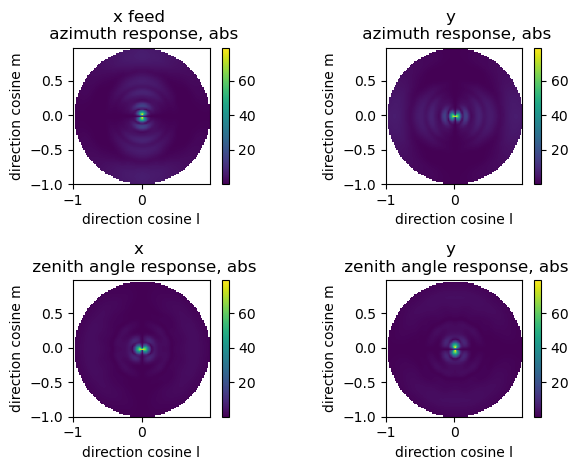

In [5]:

  >>> fig, ax = plt.subplots(2, 2)

  >>> be00 = ax[0,0].imshow(np.abs(beam_vals[0,0,0]), extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)])
  >>> _ = ax[0,0].set_title(f"{beam.feed_array[0]} feed \n azimuth response, abs")
  >>> _ = ax[0,0].set_xlabel("direction cosine l")
  >>> _ = ax[0,0].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(be00, ax=ax[0,0])

  >>> be10 = ax[1,0].imshow(np.abs(beam_vals[1,0,0]), extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)])
  >>> _ = ax[1,0].set_title(f"{beam.feed_array[0]} \n zenith angle response, abs")
  >>> _ = ax[1,0].set_xlabel("direction cosine l")
  >>> _ = ax[1,0].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(be00, ax=ax[1,0])

  >>> be01 = ax[0,1].imshow(np.abs(beam_vals[0,1,0]), extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)])
  >>> _ = ax[0,1].set_title(f"{beam.feed_array[1]} \n azimuth response, abs")
  >>> _ = ax[0,1].set_xlabel("direction cosine l")
  >>> _ = ax[0,1].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(be00, ax=ax[0,1])

  >>> be11 = ax[1,1].imshow(np.abs(beam_vals[1,1,0]), extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)])
  >>> _ = ax[1,1].set_title(f"{beam.feed_array[1]} \n zenith angle response, abs")
  >>> _ = ax[1,1].set_xlabel("direction cosine l")
  >>> _ = ax[1,1].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(be00, ax=ax[1,1])

  >>> fig.tight_layout()

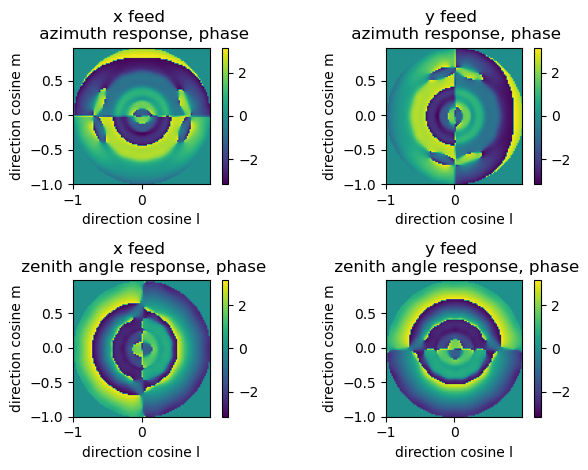

In [6]:

  >>> fig, ax = plt.subplots(2, 2)

  >>> be00 = ax[0,0].imshow(np.angle(beam_vals[0,0,0]), extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)])
  >>> _ = ax[0,0].set_title(f"{beam.feed_array[0]} feed \n azimuth response, phase")
  >>> _ = ax[0,0].set_xlabel("direction cosine l")
  >>> _ = ax[0,0].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(be00, ax=ax[0,0])

  >>> be10 = ax[1,0].imshow(np.angle(beam_vals[1,0,0]), extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)])
  >>> _ = ax[1,0].set_title(f"{beam.feed_array[0]} feed \n zenith angle response, phase")
  >>> _ = ax[1,0].set_xlabel("direction cosine l")
  >>> _ = ax[1,0].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(be00, ax=ax[1,0])

  >>> be01 = ax[0,1].imshow(np.angle(beam_vals[0,1,0]), extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)])
  >>> _ = ax[0,1].set_title(f"{beam.feed_array[1]} feed \n azimuth response, phase")
  >>> _ = ax[0,1].set_xlabel("direction cosine l")
  >>> _ = ax[0,1].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(be00, ax=ax[0,1])

  >>> be11 = ax[1,1].imshow(np.angle(beam_vals[1,1,0]), extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)])
  >>> _ = ax[1,1].set_title(f"{beam.feed_array[1]} feed \n zenith angle response, phase")
  >>> _ = ax[1,1].set_xlabel("direction cosine l")
  >>> _ = ax[1,1].set_ylabel("direction cosine m")
  >>> _ = fig.colorbar(be00, ax=ax[1,1])

  >>> fig.tight_layout()